In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data Loading and Preprocessing
df = pd.read_csv('TCS.NS_clean data.csv')

In [5]:
df

,Close,High,Low,Open,Volume
0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0
2,28.119406,28.331894,27.428814,27.428814,212976.0
3,27.738686,28.606351,27.535051,28.154811,153576.0
4,25.826298,27.800676,25.303926,27.800676,822776.0
...,...,...,...,...,...
5595,3784.100098,3874.949951,3768.149902,3872.199951,4366672.0
5596,3779.399902,3788.000000,3751.300049,3761.500000,2888572.0
5597,3786.000000,3817.000000,3775.000000,3776.100098,1833931.0
5598,3675.600098,3763.199951,3670.000000,3743.149902,2508516.0


In [7]:
df.head()

,Close,High,Low,Open,Volume
0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0
2,28.119406,28.331894,27.428814,27.428814,212976.0
3,27.738686,28.606351,27.535051,28.154811,153576.0
4,25.826298,27.800676,25.303926,27.800676,822776.0


In [9]:
df.tail()

,Close,High,Low,Open,Volume
5595,3784.100098,3874.949951,3768.149902,3872.199951,4366672.0
5596,3779.399902,3788.000000,3751.300049,3761.500000,2888572.0
5597,3786.000000,3817.000000,3775.000000,3776.100098,1833931.0
5598,3675.600098,3763.199951,3670.000000,3743.149902,2508516.0
5599,3629.550049,3658.000000,3621.250000,3625.000000,4101954.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5600 non-null   float64
 1   High    5600 non-null   float64
 2   Low     5600 non-null   float64
 3   Open    5600 non-null   float64
 4   Volume  5600 non-null   float64
dtypes: float64(5)
memory usage: 218.9 KB


In [13]:
df.shape

(5600, 5)

<Figure size 1500x500 with 0 Axes>

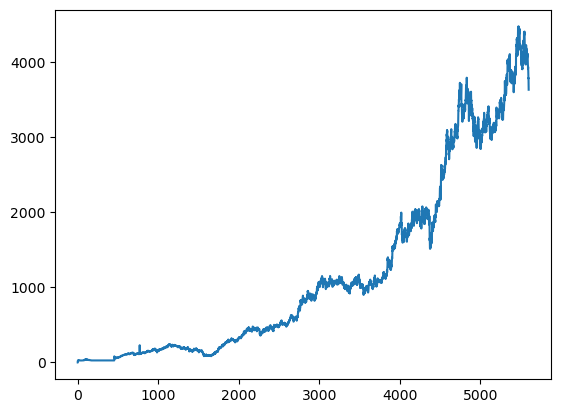

<Figure size 1500x500 with 0 Axes>

In [15]:
plt.plot(df.Close)
plt.figure(figsize=(15, 5))


In [17]:
ma100 = df.Close.rolling(100).mean()
ma100


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5595    4105.052732
5596    4100.933743
5597    4096.690261
5598    4091.884309
5599    4086.426382
Name: Close, Length: 5600, dtype: float64

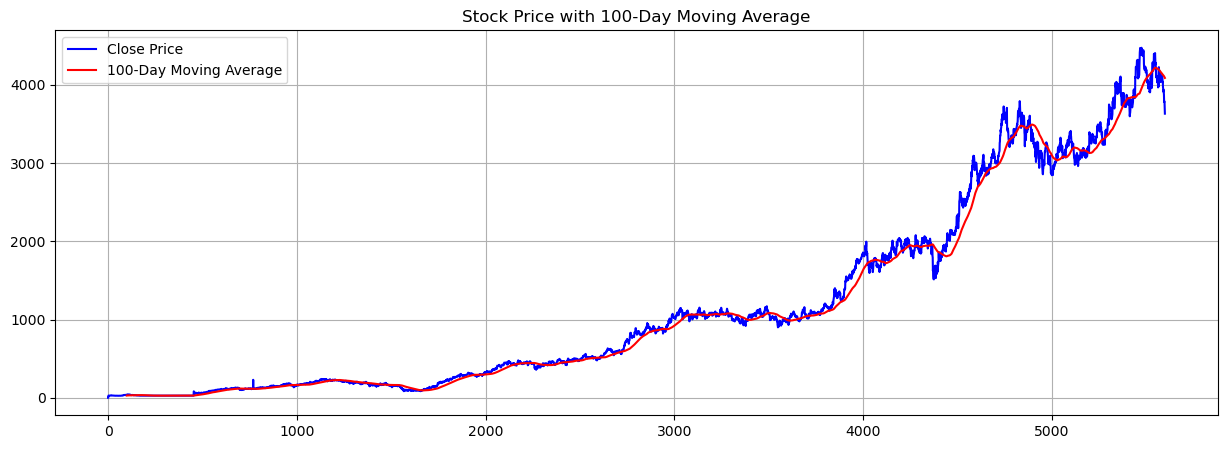

In [21]:
# Plot the data
plt.figure(figsize=(15, 5))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(ma100, label='100-Day Moving Average', color='red')  
plt.title('Stock Price with 100-Day Moving Average')
plt.legend()
plt.grid()
plt.show()


In [23]:
ma200 = df.Close.rolling(200).mean()
ma200


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5595    4082.209983
5596    4081.757950
5597    4081.348646
5598    4080.468794
5599    4079.681099
Name: Close, Length: 5600, dtype: float64

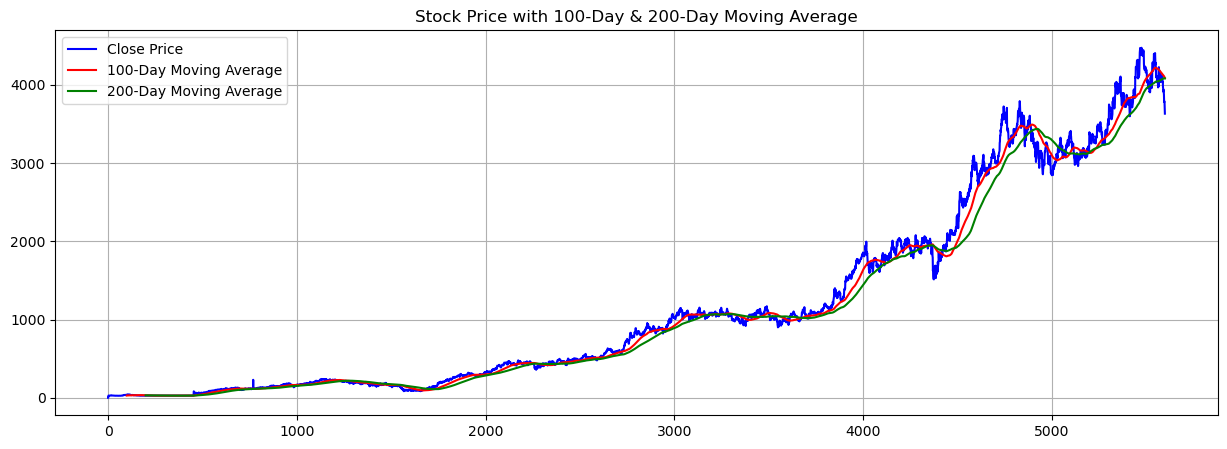

In [24]:
# Plot the data
plt.figure(figsize=(15, 5))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(ma100, label='100-Day Moving Average', color='red')  
plt.plot(ma200, label='200-Day Moving Average', color='green') 
plt.title('Stock Price with 100-Day & 200-Day Moving Average')
plt.legend()
plt.grid()
plt.show()


In [26]:
# Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70): int(len (df) )])

print(data_training.shape)
print(data_testing.shape)

(3919, 1)
(1681, 1)


In [28]:
# Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_training_array = scaler.fit_transform(data_training)


In [30]:
# Prepare data for SVR 
x_train, y_train = [], []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i].flatten())
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [32]:
# SVM (Svr)
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(x_train, y_train)


SVR(C=1000.0, gamma=0.1)

In [34]:
# Prepare test data
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
input_data = scaler.transform(final_df)


In [36]:
x_test, y_test = [], []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i].flatten())
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)


In [38]:
# Make Predictions
y_predicted = svr_model.predict(x_test)


In [40]:
# Inverse transform the predictions and actual values
y_predicted_reshaped = y_predicted.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)


In [42]:
inv_predictions = scaler.inverse_transform(y_predicted_reshaped)
inv_y_test = scaler.inverse_transform(y_test_reshaped)


In [44]:
# Save the model to a file
import pickle

with open('SVR_model.pkl', 'wb') as file:
    pickle.dump(svr_model, file)


In [46]:
# Load the saved model
with open('SVR_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

loaded_model

SVR(C=1000.0, gamma=0.1)

In [48]:
# Regression Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Accuracy of SVM Model:')
mae = mean_absolute_error(inv_y_test, inv_predictions)
mse = mean_squared_error(inv_y_test, inv_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(inv_y_test, inv_predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


Accuracy of SVM Model:
Mean Absolute Error (MAE): 1991.0902940795988
Mean Squared Error (MSE): 4867335.805917135
Root Mean Squared Error (RMSE): 2206.203935704298
R-squared (R²) Score: -6.181413994858023


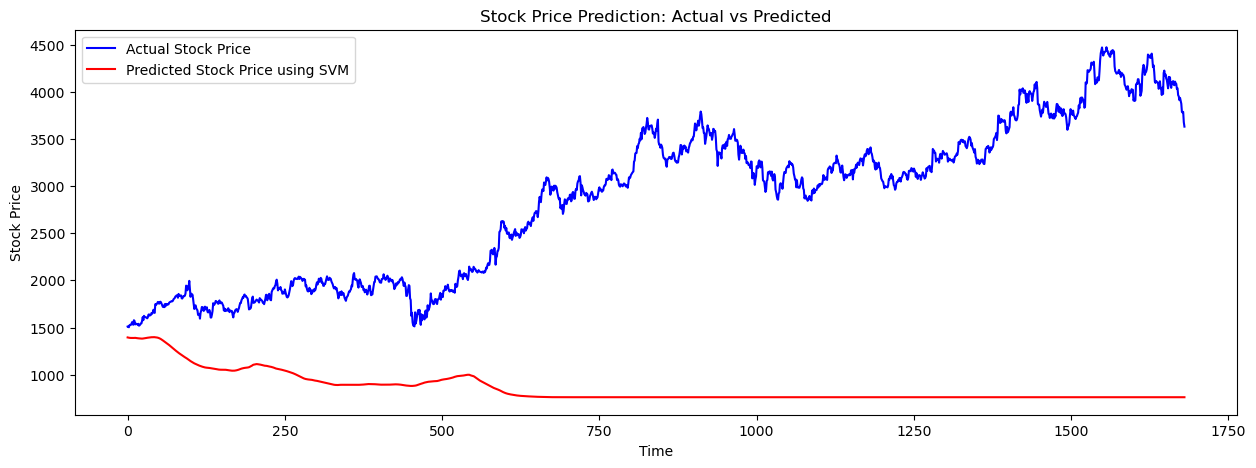

In [50]:
# Visualize Actual vs Predicted Stock Prices
plt.figure(figsize=(15, 5))
plt.plot(inv_y_test, color='blue', label='Actual Stock Price')
plt.plot(inv_predictions, color='red', label='Predicted Stock Price using SVM')
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
#plt.grid()
plt.show()
